In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('D:\\Data Analysis TP\\NLP Twitter sentiment analysis\\twitter.csv')

In [121]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [122]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [123]:
# Dropping last n rows using drop as there are too many rows to model
df.drop(df.tail(21962).index,
        inplace = True)

In [124]:
df.describe()

,id,label
count,10000.00000,10000.000000
mean,5000.50000,0.069500
std,2886.89568,0.254315
min,1.00000,0.000000
25%,2500.75000,0.000000
50%,5000.50000,0.000000
75%,7500.25000,0.000000
max,10000.00000,1.000000


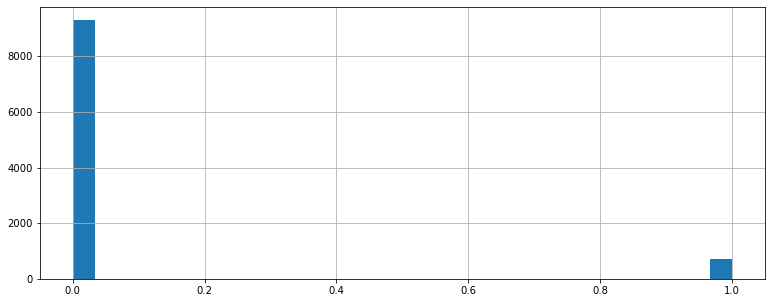

In [125]:
df['label'].hist(bins=30,figsize=(13,5))

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


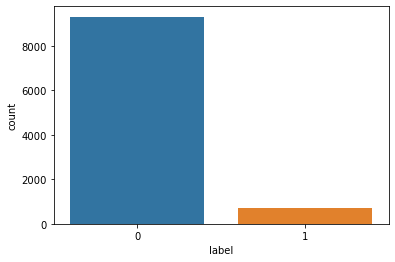

In [126]:
sns.countplot(df['label'])

In [127]:
#Create a column containing length of tweet text
df['text length'] = df['tweet'].apply(len)

In [128]:
df.head()

,id,label,tweet,text length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


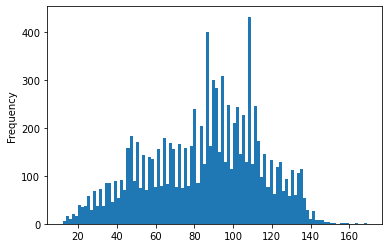

In [129]:
df['text length'].plot(bins=100, kind='hist')

In [130]:
#Seperate positive and negative tweets according to label. 0: positive, 1: negative
pos = df[df['label'] == 0]
neg = df[df['label'] == 1]

In [131]:
#Put all tweets in a single list
sentence = df['tweet'].tolist()

In [132]:
len(sentence)

10000

In [133]:
#Join list elements into a single string
one_sentence = " ".join(sentence)

In [134]:
from wordcloud import WordCloud as wc

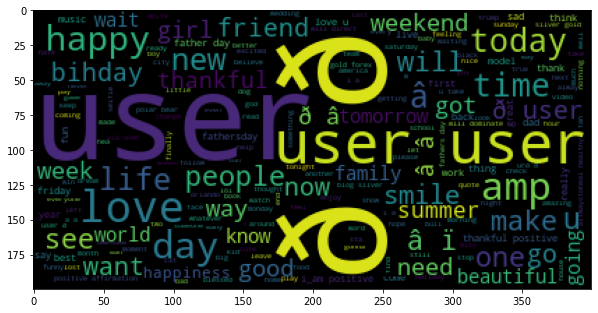

In [135]:
#Create wordcloud for all words in tweets
plt.figure(figsize=(10,10))
plt.imshow(wc().generate(one_sentence))

In [136]:
#Wordcloud for only negative tweets
neg_sent = neg['tweet'].tolist()

In [137]:
neg_string = " ".join(neg_sent)

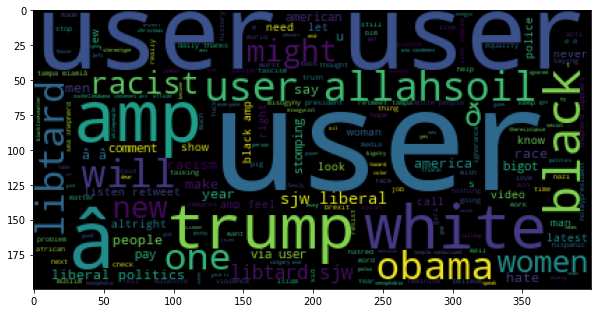

In [138]:
plt.figure(figsize=(10,10))
plt.imshow(wc().generate(neg_string))

In [139]:
##DATA CLEANING##
import string
from nltk.corpus import stopwords
eng = stopwords.words('english')
def message_cleaner(mess):
    punc_removed = [char for char in mess if char not in string.punctuation]
    punc_rem_str = ''.join(punc_removed)
    stop_punc_removed = [word for word in punc_rem_str.split() if word.lower() not in eng]
    return stop_punc_removed

In [140]:
#Perform Count Vectorization for entire dataframe
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer=message_cleaner)
df_cv= cv.fit_transform(df['tweet']).toarray() 

In [141]:
df_cv.shape

(10000, 21720)

In [142]:
#Independent variable
X = df_cv

#Dependent variable
y = df['label']

In [143]:
print(X.shape,y.shape)

(10000, 21720) (10000,)


In [144]:
#Split the data
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [146]:
#Create Naive-Bayes Classifier model
from sklearn.naive_bayes import MultinomialNB

In [147]:
model = MultinomialNB()

In [148]:
model.fit(X_train,y_train)

MultinomialNB()

In [149]:
pred = model.predict(X_test)

In [150]:
from sklearn.metrics import confusion_matrix,classification_report

In [151]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1857
           1       0.48      0.49      0.49       143

    accuracy                           0.93      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.93      0.93      0.93      2000

